In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# 8 emotions

Load data

In [66]:
data = pd.read_csv('combined_dataset.csv')
data

,HRV_ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,AVG_HRV_TINN,AVG_SCR_Peaks_N,AVG_SCR_Peaks_Amplitude_Mean,AVG_EDA_Tonic_SD,AVG_EDA_Symp,AVG_EDA_SympN,AVG_EDA_Autocorrelation,COND:,ANS_VALENCE,ANS_AROUSAL
0,71.196120,842.428571,64.762313,75.081289,76.724456,0.076876,0.089125,834.0,56.3388,0.067553,...,-85.9375,34.0,1.500946e-07,0.000028,1.143748e-14,-0.000088,0.618238,P-,3.319,6.556
1,80.527350,753.869565,124.272174,142.655179,144.139791,0.164846,0.189231,766.0,80.0604,0.104517,...,-500.0000,38.0,2.317967e-07,0.000028,-4.470215e-15,-0.049684,0.611132,S-,3.484,6.640
2,72.622615,834.666667,134.179109,129.822186,130.454106,0.160758,0.155538,854.0,68.1996,0.079859,...,-390.6250,37.0,1.972055e-07,0.000028,6.335921e-15,0.000247,0.644532,S-,3.900,6.151
3,69.528205,863.250000,52.152484,51.687828,53.014673,0.060414,0.059876,846.5,48.1845,0.056922,...,-46.8750,34.0,1.921208e-07,0.000028,1.210543e-14,0.007215,0.631521,PS-,2.505,7.905
4,72.177567,831.380952,51.758551,55.663273,56.423586,0.062256,0.066953,825.0,41.5128,0.050319,...,-109.3750,34.0,1.902157e-07,0.000029,1.082776e-14,-0.050180,0.611717,PS+,7.376,7.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,97.801199,627.888889,188.988264,211.550503,215.317683,0.300990,0.336923,709.0,130.4688,0.184018,...,-78.1250,23.0,1.339092e-05,0.000049,1.128420e-11,0.033017,1.083340,P-,1.000,5.025
10558,94.860376,640.535714,120.910583,149.975554,152.450814,0.188765,0.234141,640.0,88.9560,0.138994,...,-289.0625,22.0,1.350138e-05,0.000049,1.128396e-11,0.020399,1.045968,P-,1.000,5.702
10559,85.418136,712.360000,156.775817,189.233322,192.940837,0.220079,0.265643,697.0,127.5036,0.182932,...,-390.6250,21.0,1.364612e-05,0.000049,1.128648e-11,0.016483,1.146099,S+,9.000,9.000
10560,87.073850,691.076923,45.783773,62.721607,63.894888,0.066250,0.090759,675.5,38.5476,0.057065,...,-54.6875,20.0,1.363783e-05,0.000049,1.128404e-11,-0.001148,0.703394,PS+,9.000,5.000


In [67]:
cords = data.iloc[:, -2:]
cords

,ANS_VALENCE,ANS_AROUSAL
0,3.319,6.556
1,3.484,6.640
2,3.900,6.151
3,2.505,7.905
4,7.376,7.485
...,...,...
10557,1.000,5.025
10558,1.000,5.702
10559,9.000,9.000
10560,9.000,5.000


Use KMeans to create clusters

In [68]:
kmeans = KMeans(n_clusters=8, init='k-means++', algorithm='lloyd', n_init=10, max_iter=300, random_state=0)
fit = kmeans.fit(cords)

In [69]:
centroids = fit.cluster_centers_
labels = fit.labels_
unique_labels = np.unique(fit.labels_)

data['LABEL'] = labels

Visualize results

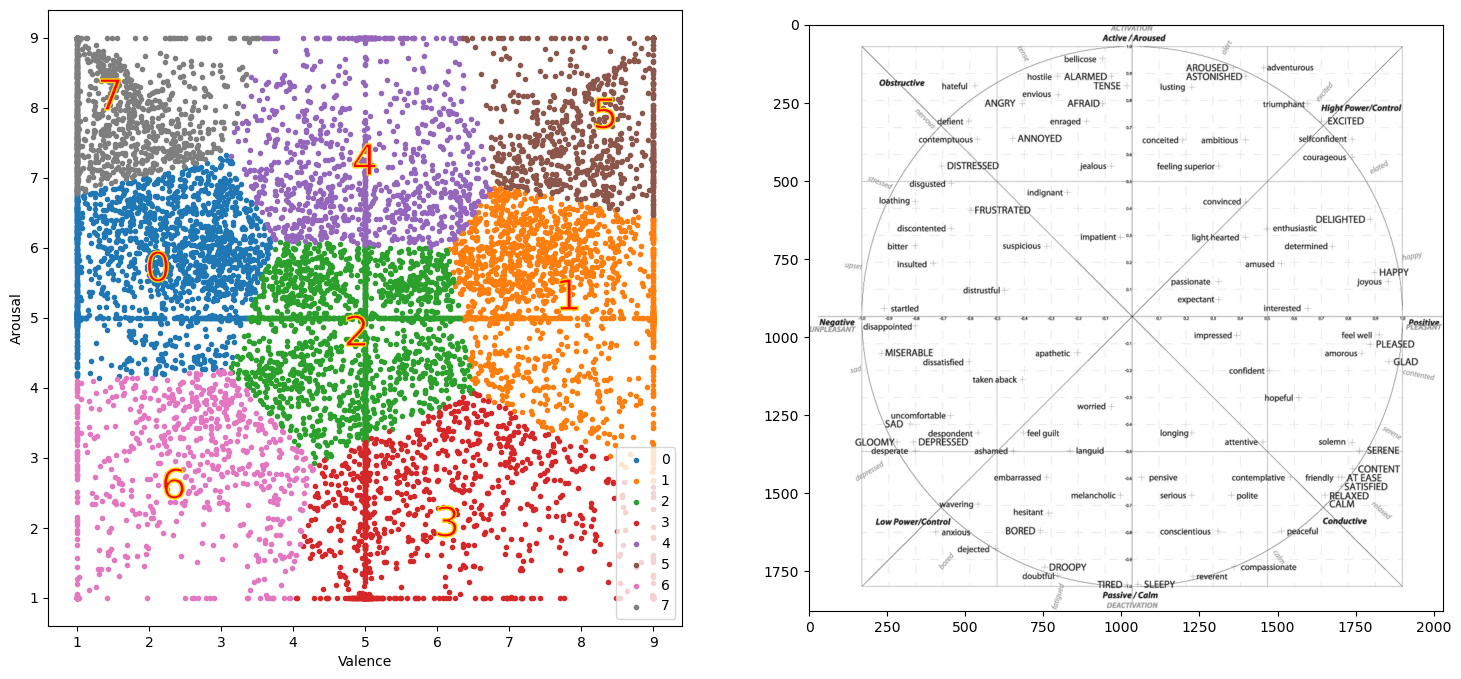

In [70]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])

for label in unique_labels:
    ax[0].scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')
    ax[0].scatter(centroids[label][0], centroids[label][1], marker=f'${label}$', s=500, c=['red'], edgecolors=['gold'])

ax[0].set(xlabel='Valence', ylabel='Arousal')
ax[0].legend()
# https://link.springer.com/article/10.1007/s11263-019-01158-4
image = plt.imread('emotion_wheel.webp')
ax[1].imshow(image)
plt.show()

Manually assign clusters to emotions

In [71]:
data.loc[data['LABEL'] == 0, 'LABEL'] = 'Wstret'
data.loc[data['LABEL'] == 1, 'LABEL'] = 'Radosc'
data.loc[data['LABEL'] == 2, 'LABEL'] = 'Neutralna'
data.loc[data['LABEL'] == 3, 'LABEL'] = 'Odprezenie'
data.loc[data['LABEL'] == 4, 'LABEL'] = 'Zdziwienie'
data.loc[data['LABEL'] == 5, 'LABEL'] = 'Ekscytacja'
data.loc[data['LABEL'] == 6, 'LABEL'] = 'Smutek'
data.loc[data['LABEL'] == 7, 'LABEL'] = 'Zlosc'

Create clustering visualization

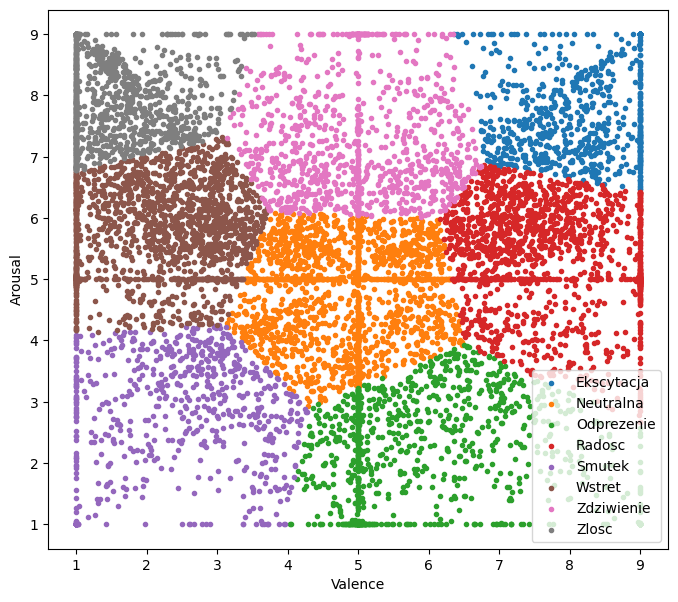

In [72]:
verbose_labels = np.unique(data['LABEL'])

plt.figure(figsize=(8, 7))
for label in verbose_labels:
    plt.scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend()
plt.show()

Save data to file

In [73]:
data.to_csv('labeled_8_combined_dataset.csv')

# 6 emotions

Load data

In [74]:
data = pd.read_csv('combined_dataset.csv')

Create clusters

In [75]:
kmeans = KMeans(n_clusters=6, init='k-means++', algorithm='lloyd', n_init=10, max_iter=300, random_state=0)
fit = kmeans.fit(cords)

In [76]:
centroids = fit.cluster_centers_
labels = fit.labels_
unique_labels = np.unique(fit.labels_)

data['LABEL'] = labels

Assign labels

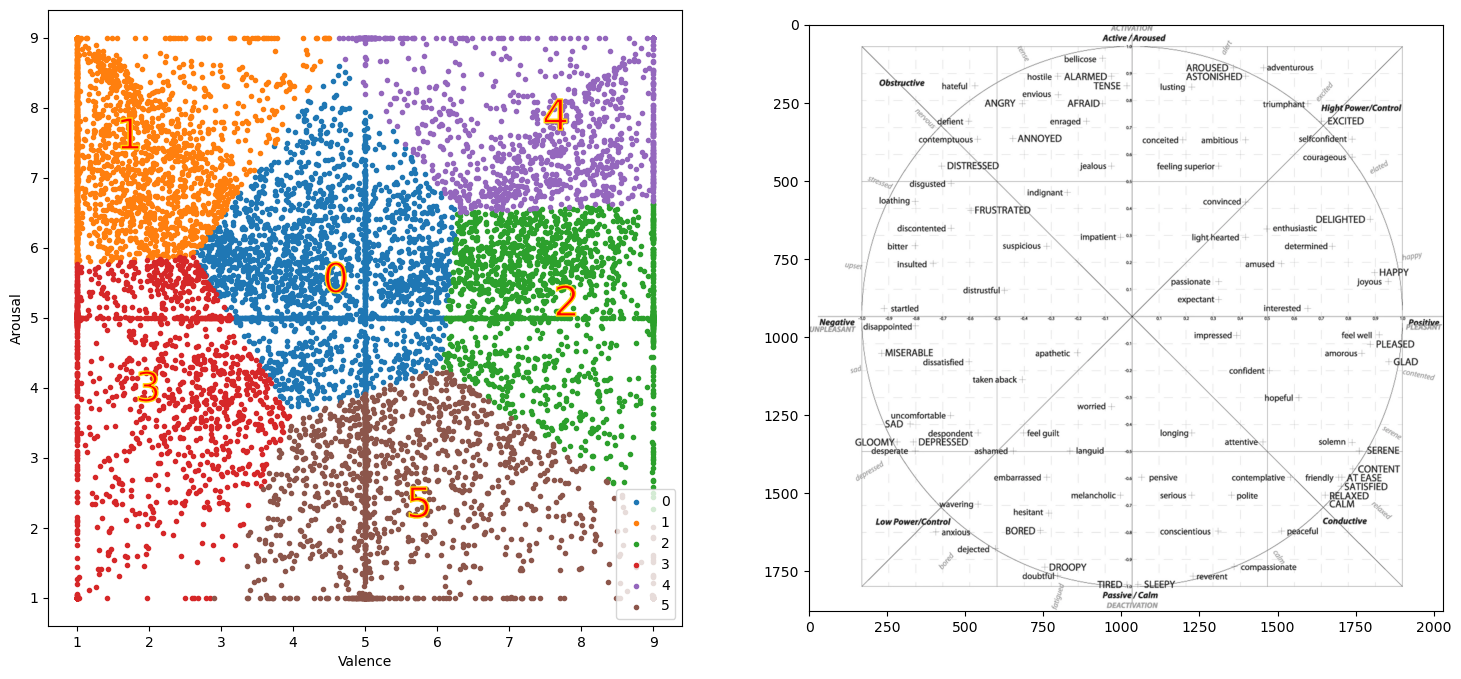

In [77]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])

for label in unique_labels:
    ax[0].scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')
    ax[0].scatter(centroids[label][0], centroids[label][1], marker=f'${label}$', s=500, c=['red'], edgecolors=['gold'])

ax[0].set(xlabel='Valence', ylabel='Arousal')
ax[0].legend()
# https://link.springer.com/article/10.1007/s11263-019-01158-4
image = plt.imread('emotion_wheel.webp')
ax[1].imshow(image)
plt.show()

In [78]:
data.loc[data['LABEL'] == 0, 'LABEL'] = 'Neutralna'
data.loc[data['LABEL'] == 1, 'LABEL'] = 'Zlosc'
data.loc[data['LABEL'] == 2, 'LABEL'] = 'Radosc'
data.loc[data['LABEL'] == 3, 'LABEL'] = 'Smutek'
data.loc[data['LABEL'] == 4, 'LABEL'] = 'Ekscytacja'
data.loc[data['LABEL'] == 5, 'LABEL'] = 'Odprezenie'

Visualize

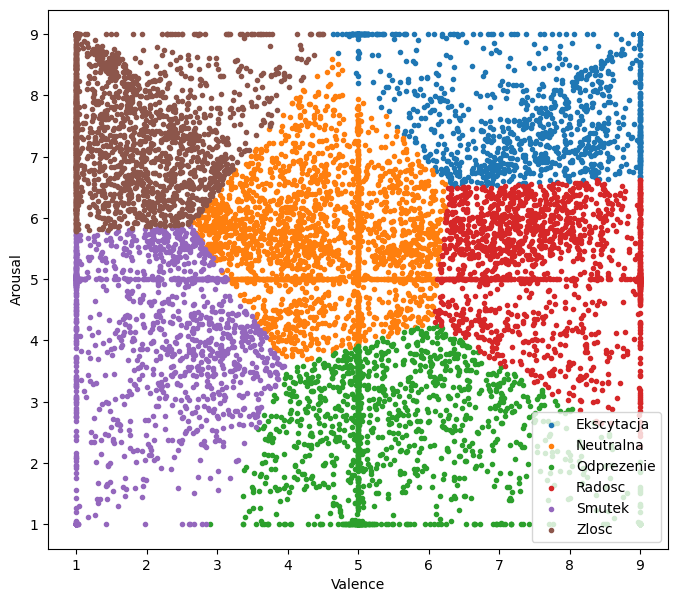

In [79]:
verbose_labels = np.unique(data['LABEL'])

plt.figure(figsize=(8, 7))
for label in verbose_labels:
    plt.scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend()
plt.show()

Write to file

In [80]:
data.to_csv('labeled_6_combined_dataset.csv')

# 4 emotions

Load data

In [82]:
data = pd.read_csv('combined_dataset.csv')

Create clusters

In [83]:
kmeans = KMeans(n_clusters=4, init='k-means++', algorithm='lloyd', n_init=10, max_iter=300, random_state=0)
fit = kmeans.fit(cords)

centroids = fit.cluster_centers_
labels = fit.labels_
unique_labels = np.unique(fit.labels_)

data['LABEL'] = labels

Assign labels

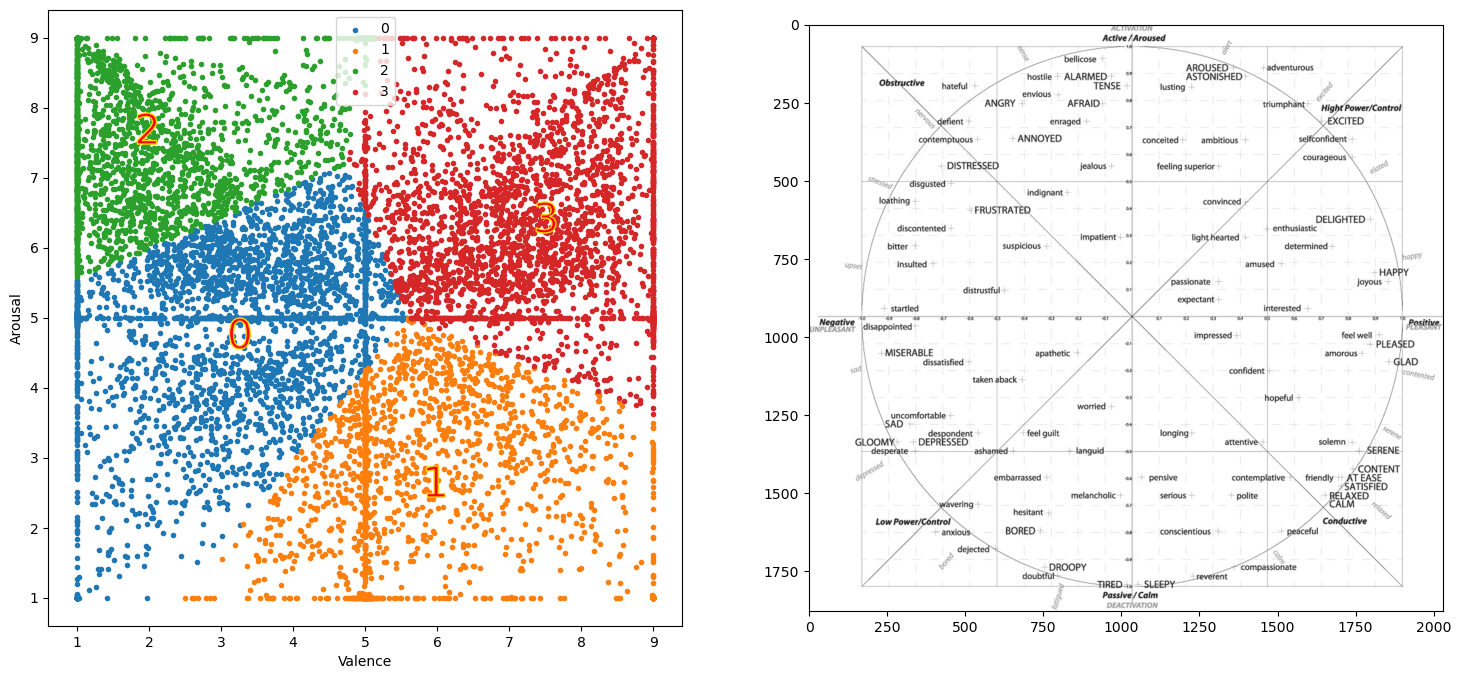

In [84]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])

for label in unique_labels:
    ax[0].scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')
    ax[0].scatter(centroids[label][0], centroids[label][1], marker=f'${label}$', s=500, c=['red'], edgecolors=['gold'])

ax[0].set(xlabel='Valence', ylabel='Arousal')
ax[0].legend()
# https://link.springer.com/article/10.1007/s11263-019-01158-4
image = plt.imread('emotion_wheel.webp')
ax[1].imshow(image)
plt.show()

In [85]:
data.loc[data['LABEL'] == 0, 'LABEL'] = 'Smutek'
data.loc[data['LABEL'] == 1, 'LABEL'] = 'Odprezenie'
data.loc[data['LABEL'] == 2, 'LABEL'] = 'Zlosc'
data.loc[data['LABEL'] == 3, 'LABEL'] = 'Ekscytacja'

Visualize

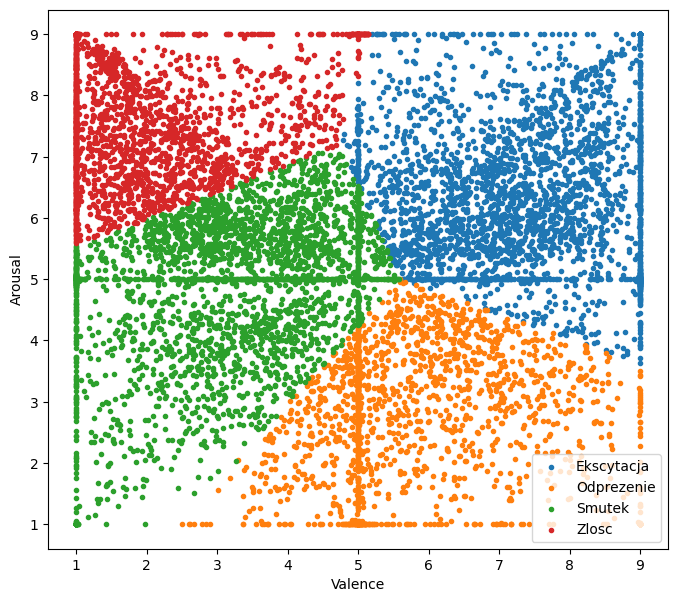

In [86]:
verbose_labels = np.unique(data['LABEL'])

plt.figure(figsize=(8, 7))
for label in verbose_labels:
    plt.scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend()
plt.show()

Write to file

In [87]:
data.to_csv('labeled_4_combined_dataset.csv')